### Los mensajes que salen en algunos ejercicios no son errores. Son advertencias, exactamente una alerta estándar para recordar la importancia de la trazabilidad de las columnas (feature names) al pasar de Pandas DataFrames a arreglos de NumPy para la predicción. 

# Punto 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [3]:
data_ventas = {
    'Publicidad (miles USD)': [1, 2, 3, 4, 5, 6],
    'Ventas (miles USD)': [3, 4.5, 6, 7.5, 9, 10]}
df_ventas = pd.DataFrame(data_ventas)

#### Gráfica

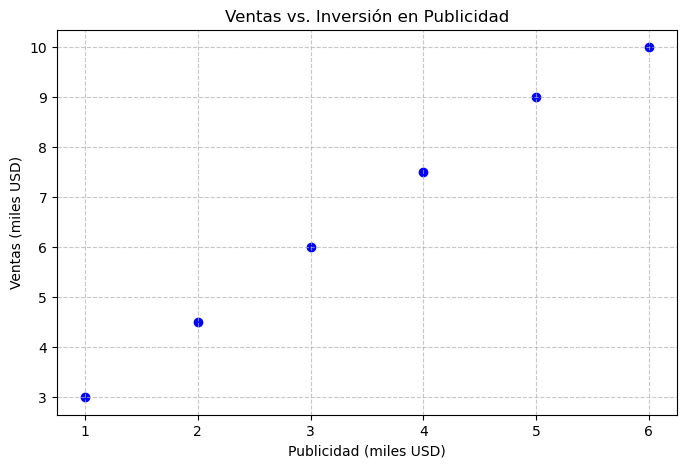

In [5]:
plt.figure(figsize=(8, 5))
plt.scatter(df_ventas['Publicidad (miles USD)'], df_ventas['Ventas (miles USD)'], color='blue')
plt.title('Ventas vs. Inversión en Publicidad')
plt.xlabel('Publicidad (miles USD)')
plt.ylabel('Ventas (miles USD)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [7]:
X = df_ventas[['Publicidad (miles USD)']]
y = df_ventas['Ventas (miles USD)']

In [9]:
modelo = LinearRegression()
modelo.fit(X, y)

LinearRegression()

In [11]:
pendiente = modelo.coef_[0]
intercepto = modelo.intercept_
print("Pendiente:", pendiente)
print("Intercepto:", intercepto)
print("Ecuación del modelo: Ventas =", pendiente, "Publicidad +", intercepto)

Pendiente: 1.4285714285714288
Intercepto: 1.666666666666666
Ecuación del modelo: Ventas = 1.4285714285714288 Publicidad + 1.666666666666666


##### Predicción para inversión

In [15]:
inversion_futura = pd.DataFrame({'Publicidad (miles USD)':[7]}) 
ventas_predichas = modelo.predict(inversion_futura)
print("Con una inversión de 7 mil USD, las ventas predichas son:", ventas_predichas, "miles USD")

Con una inversión de 7 mil USD, las ventas predichas son: [11.66666667] miles USD


#### Gráfica línea de regresión

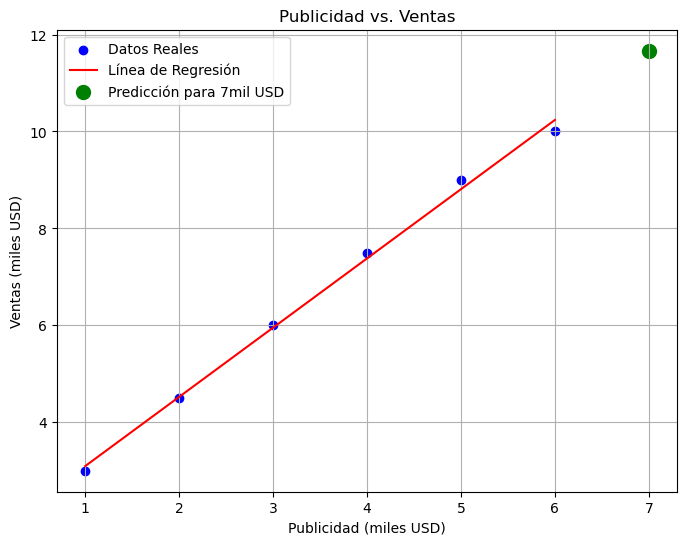

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Datos Reales')
plt.plot(X, modelo.predict(X), color='red', label='Línea de Regresión')
plt.scatter(inversion_futura, ventas_predichas, color='green', marker='o', s=100, label='Predicción para 7mil USD')
plt.title('Publicidad vs. Ventas')
plt.xlabel('Publicidad (miles USD)')
plt.ylabel('Ventas (miles USD)')
plt.legend()
plt.grid(True)
plt.show()

# Punto 2

In [21]:
data_multiple = {
    'Publicidad Digital (miles USD)': [2, 3, 4, 5, 6, 7],
    'Publicidad TV (miles USD)': [4, 5, 6, 7, 8, 9],
    'Ventas (miles USD)': [8, 10, 12, 13, 15, 16]
}
df_multiple = pd.DataFrame(data_multiple)
print(df_multiple)

   Publicidad Digital (miles USD)  Publicidad TV (miles USD)  \
0                               2                          4   
1                               3                          5   
2                               4                          6   
3                               5                          7   
4                               6                          8   
5                               7                          9   

   Ventas (miles USD)  
0                   8  
1                  10  
2                  12  
3                  13  
4                  15  
5                  16  


#### Definición de variables

In [23]:
X = df_multiple[['Publicidad Digital (miles USD)', 'Publicidad TV (miles USD)']]
y = df_multiple['Ventas (miles USD)']

#### Ajuste de modelo

In [25]:
model_rmultiple = LinearRegression()
model_rmultiple.fit(X, y)

LinearRegression()

In [27]:
coef_digital = model_rmultiple.coef_[0]
coef_tv = model_rmultiple.coef_[1]
intercepto = model_rmultiple.intercept_
print("Ecuación del modelo: Ventas = ",intercepto , " + ", coef_digital, "Pub_Digital +", coef_tv, "Pub_TV")

Ecuación del modelo: Ventas =  3.533333333333333  +  0.8000000000000003 Pub_Digital + 0.8 Pub_TV


#### Predicción

In [29]:
y_pred = model_rmultiple.predict(X)

#### Evaluar Modelo

In [31]:
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print("mse es: ", mse)
print("r2 es : ", r2)

mse es:  0.08888888888888878
r2 es :  0.9882352941176471


#### Nuevas Predicción

In [33]:
nueva_inversion = np.array([[6, 10]])
ventas_p = model_rmultiple.predict(nueva_inversion)
print("Con una inversión de 6k USD en Digital y 10k USD en TV, las ventas predichas son:", ventas_p, "miles USD")  

Con una inversión de 6k USD en Digital y 10k USD en TV, las ventas predichas son: [16.33333333] miles USD


C:\Users\yulpr\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Ejercicio 3

In [35]:
data_polinomial = {
    'Mes': [1, 2, 3, 4, 5, 6],
    'Usuarios (miles)': [5, 8, 14, 22, 35, 50]}
df_polinomial = pd.DataFrame(data_polinomial)

#### Definición de Variables

In [37]:
X = df_polinomial[['Mes']]
y = df_polinomial['Usuarios (miles)']

#### Transformación Polinomial

In [39]:
poli_features = PolynomialFeatures(degree=2)
X_poli = poli_features.fit_transform(X)

#### Ajuste Modelo 

In [41]:
model_polinomial = LinearRegression()
model_polinomial.fit(X_poli, y)

LinearRegression()

#### Predicción

In [43]:
y_pred_poli = model_polinomial.predict(X_poli)

#### Evaluar Modelo

In [45]:
r2_p = r2_score(y, y_pred_poli)
print("r2 es : ", r2_p)

r2 es :  0.9995813245369196


#### Nueva Predicción

In [47]:
mes_futuro = np.array([[7]])
mes_futuro_poli = poli_features.transform(mes_futuro)
usuarios_predichos = model_polinomial.predict(mes_futuro_poli)
print("La predicción de usuarios para el Mes 8 es:",usuarios_predichos,"miles de usuarios")

La predicción de usuarios para el Mes 8 es: [68.4] miles de usuarios


C:\Users\yulpr\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


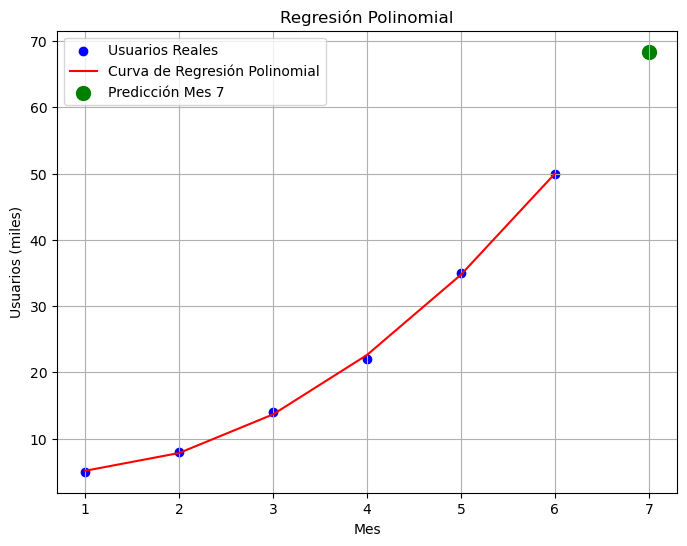

In [49]:
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Usuarios Reales')
plt.plot(X, y_pred_poli, color='red', label='Curva de Regresión Polinomial')
plt.scatter(mes_futuro, usuarios_predichos, color='green', marker='o', s=100, label='Predicción Mes 7')
plt.title('Regresión Polinomial')
plt.xlabel('Mes')
plt.ylabel('Usuarios (miles)')
plt.legend()
plt.grid(True)
plt.show()

# Ejercicio 4

In [51]:
data_academico = {
    'Horas de Estudio': [5, 8, 10, 12, 15, 18],
    'Nota Promedio': [2.8, 3.2, 3.5, 3.8, 4.1, 4.3]}
df_academico = pd.DataFrame(data_academico)

#### Definición de Variables

In [53]:
X = df_academico[['Horas de Estudio']]
y = df_academico['Nota Promedio']

#### Ajustar Modelo

In [55]:
model_notas = LinearRegression()
model_notas.fit(X, y)

LinearRegression()

#### Predicción

In [57]:
y_pred = model_notas.predict(X)

#### Evaluar Modelo

In [59]:
r2_n = r2_score(y, y_pred)
print("r2 es : ", r2_n)

r2 es :  0.9803582761025693


#### Nueva Predicción

In [61]:
horas_f = pd.DataFrame({'Horas de Estudio': [14]})
nota_predicha = model_notas.predict(horas_f)[0]
print("Nota promedio predicha para 14 horas de estudio:", nota_predicha)

Nota promedio predicha para 14 horas de estudio: 3.932035928143713


#### Gráfica

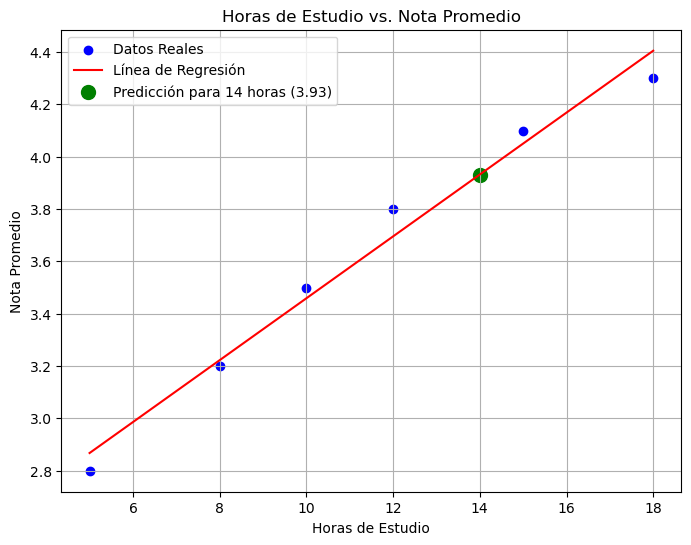

In [63]:
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Datos Reales')
plt.plot(X, model_notas.predict(X), color='red', label='Línea de Regresión')
plt.scatter(horas_f, nota_predicha, color='green', marker='o', s=100, label=f'Predicción para 14 horas ({nota_predicha:.2f})')
plt.title("Horas de Estudio vs. Nota Promedio")
plt.xlabel("Horas de Estudio")
plt.ylabel("Nota Promedio")
plt.legend()
plt.grid(True)
plt.show()

# Ejercicio 5

In [66]:
data_proyecto = {
    'Trabajadores': [5, 8, 10, 12, 15, 18],
    'Semanas': [10, 8, 12, 9, 11, 10],
    'Costo (miles USD)': [50, 60, 85, 95, 120, 135]}
df_proyecto = pd.DataFrame(data_proyecto)

#### Definir Variables

In [68]:
X_mult = df_proyecto[['Trabajadores', 'Semanas']]
y_mult = df_proyecto['Costo (miles USD)']

#### Ajustar Modelo

In [70]:
model_proyecto = LinearRegression()
model_proyecto.fit(X_mult, y_mult)

LinearRegression()

#### Interpretar Coeficientes

In [72]:
coef_trabajadores = model_proyecto.coef_[0]
coef_semanas = model_proyecto.coef_[1]
print("Por cada trabajador adicional, el costo aumenta:", coef_trabajadores ,"mil USD.")
print("Por cada semana adicional, el costo aumenta:", coef_semanas,"mil USD.")

Por cada trabajador adicional, el costo aumenta: 6.7726276229251505 mil USD.
Por cada semana adicional, el costo aumenta: 2.7591606639523967 mil USD.


#### Predicción

In [74]:
y_pred_mult = model_proyecto.predict(X_mult)

#### Evaluar Modelo

In [76]:
mse_p = mean_squared_error(y_mult, y_pred_mult)
r2_p = r2_score(y_mult, y_pred_mult)
print("mse es: ", mse_p)
print("r2 es : ", r2_p)

mse es:  4.399598079131428
r2 es :  0.9951748505453547


#### Predicción Futura

In [78]:
prediccion_futura = pd.DataFrame({
    'Trabajadores': [14],
    'Semanas': [12]})
costo_predicho = model_proyecto.predict(prediccion_futura)[0]
print("Costo predicho para 14 trabajadores y 12 semanas:", costo_predicho, "miles USD")

Costo predicho para 14 trabajadores y 12 semanas: 114.41199498903853 miles USD


# Ejercicio 6

In [80]:
data_poblacion = {
    'Año_r': [0, 2, 4, 6, 8, 10], # Es para simplificar el modelo y no tener problemas en las gráficas, 0 es 2000 y así.
    'Poblacion': [120, 130, 150, 180, 220, 270]}
df_poblacion = pd.DataFrame(data_poblacion)

#### Definir Variables

In [82]:
X = df_poblacion[['Año_r']]
y = df_poblacion['Poblacion']

#### Ajustar Modelo de Regresión Lineal

In [84]:
model_lineal = LinearRegression()
model_lineal.fit(X, y)

LinearRegression()

#### Predicción Modelo Lineal

In [86]:
y_pred_li = model_lineal.predict(X)

#### Evaluar Modelo Lineal

In [88]:
r2_li = r2_score(y, model_lineal.predict(X))
print("r2 en el modelo lineal es : ", r2_li)

r2 en el modelo lineal es :  0.9440559440559441


#### Ajustar Modelo de Regresión Polinomial Grado 2

In [90]:
poli_2 = PolynomialFeatures(degree=2)
X_poli_2 = poli_2.fit_transform(X)
model_poli_2 = LinearRegression()
model_poli_2.fit(X_poli_2, y)

LinearRegression()

#### Predicción Modelo Polinomial 2

In [92]:
y_pred_poli_2 = model_poli_2.predict(X_poli_2)

#### Evaluar Modelo Polinomial 2

In [94]:
r2_po2 = r2_score(y, y_pred_poli_2)
print("r2 en el modelo polinomial de grado 2 es : ", r2_po2)

r2 en el modelo polinomial de grado 2 es :  1.0


#### Ajustar Modelo de Regresión Polinomial Grado 3

In [96]:
poli_3 = PolynomialFeatures(degree=3)
X_poli_3 = poli_3.fit_transform(X)
model_poli_3 = LinearRegression()
model_poli_3.fit(X_poli_3, y)

LinearRegression()

#### Predicción Modelo Polinomial 3

In [98]:
y_pred_poli_3 = model_poli_3.predict(X_poli_3)

#### Evaluar Modelo Polinomial 3

In [100]:
r2_po3 = r2_score(y, y_pred_poli_3)
print("r3 en el modelo polinomial de grado 3 es : ", r2_po3)

r3 en el modelo polinomial de grado 3 es :  1.0


#### Predicción para 2012

In [102]:
año_f= np.array([[12]])
pred_li= model_lineal.predict(año_f)[0]
pred_po2 = model_poli_2.predict(poli_2.transform(año_f))[0]
pred_po3 = model_poli_3.predict(poli_3.transform(año_f))[0]
print("Predicción lineal:", pred_li, "miles")
print("Predicción polinomial grado 2:", pred_po2, "miles")
print("Predicción polinomial grado 3:", pred_po3, "miles")  

Predicción lineal: 283.33333333333337 miles
Predicción polinomial grado 2: 330.00000000000006 miles
Predicción polinomial grado 3: 329.99999999999966 miles


C:\Users\yulpr\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\yulpr\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\yulpr\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


#### Gráfica de Comparación

C:\Users\yulpr\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\yulpr\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


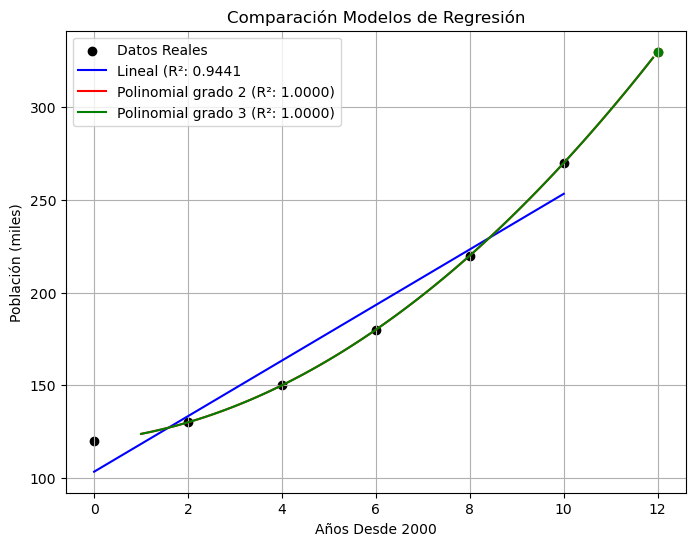

In [104]:
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='black', label='Datos Reales')

#Modelo lineal
plt.plot(X, y_pred_li, color='blue', label='Lineal (R²: ' + f'{r2_li:.4f}')

#Modelos polinomiales
X_plot = np.arange(1, 12, 0.1).reshape(-1, 1)
plt.plot(X_plot, model_poli_2.predict(poli_2.transform(X_plot)), color='red', label='Polinomial grado 2 (R²: ' + f'{r2_po2:.4f})')
plt.plot(X_plot, model_poli_3.predict(poli_3.transform(X_plot)), color='green', label='Polinomial grado 3 (R²: ' + f'{r2_po3:.4f})')
plt.scatter(12, pred_po2, color='red', marker='o')
plt.scatter(12, pred_po3, color='green', marker='o')

#Información en la gráfica
plt.title('Comparación Modelos de Regresión')
plt.xlabel('Años Desde 2000')
plt.ylabel('Población (miles)')
plt.legend()
plt.grid(True)
plt.show()

# Ejercicio 7

In [106]:
data_combustible = {
    'Distancia': [10, 15, 20, 25, 30, 35],
    'Pasajeros': [20, 30, 25, 35, 40, 45],
    'Consumo': [15, 25, 28, 40, 48, 55]}
df_combustible = pd.DataFrame(data_combustible)

#### Crear Variable Sintética

In [108]:
df_combustible['Dis_Pas'] = df_combustible['Distancia'] * df_combustible['Pasajeros']
print(df_combustible.head())

   Distancia  Pasajeros  Consumo  Dis_Pas
0         10         20       15      200
1         15         30       25      450
2         20         25       28      500
3         25         35       40      875
4         30         40       48     1200


#### Definir Variables

In [110]:
X = df_combustible[['Distancia', 'Pasajeros', 'Dis_Pas']]
y = df_combustible['Consumo']

#### Ajustar Modelo

In [112]:
model_interaccion = LinearRegression()
model_interaccion.fit(X, y)

LinearRegression()

#### Coeficientes

In [114]:
coef_distancia = model_interaccion.coef_[0]
coef_pasajeros = model_interaccion.coef_[1]
coef_interaccion = model_interaccion.coef_[2]
intercepto = model_interaccion.intercept_
print("Ecuación del modelo: Consumo = ", intercepto, "+", coef_distancia, "Distancia + ", coef_pasajeros, "Pasajeros +", coef_interaccion, "Distancia por Pasajeros")

Ecuación del modelo: Consumo =  -7.751390996459264 + 1.163429438543245 Distancia +  0.5494688922610014 Pasajeros + -0.0013960546282245458 Distancia por Pasajeros


#### Predicción 

In [116]:
y_pred = model_interaccion.predict(X)

#### Evaluar Modelo

In [118]:
mse_in = mean_squared_error(y, y_pred)
r2_in = r2_score(y, y_pred)
print("mse es: ", mse_in)
print("r2 es : ", r2_in)

mse es:  0.2927836789748801
r2 es :  0.9984628536614998


#### Nueva Predicción

In [120]:
distancia_n = 28
pasajeros_n = 32
interaccion_n = distancia_n * pasajeros_n

nueva_prediccion = pd.DataFrame({
    'Distancia': [distancia_n],
    'Pasajeros': [pasajeros_n],
    'Dis_Pas': [interaccion_n]})
consumo_predicho = model_interaccion.predict(nueva_prediccion)
print("Consumo predicho para 28km y 32 pasajeros:", consumo_predicho, "litros")

Consumo predicho para 28km y 32 pasajeros: [41.15677289] litros


# Preguntas Finales

#### Diferencias entre regresión simple, múltiple y polinomial. 

**Regresión simple:** Es la más fácil de trabajar, solo utiliza una variable para predecir otra. Es una buena opción cuando hay una tendencia clara y constante, como en el ejercicio 4 de las horas de estudio. Sin embargo, no es la mejor cuando hay crecimiento acelerado porque, al ser una recta, subestima los valores futuros. 

**Regresión múltiple:** Trabaja más de una variable. Aún así es algo sencilla, su dificultad está en el análisis estadístico. Esto se debe a que el coeficiente de una variable solo es válido si todas las otras variables se mantienen constantes. Si las variables están muy correlacionadas, los coeficientes se vuelven inestables, al quitar un dato pueden cambiar drasticamente y ser menos confiables. El modelo trabaja como una recta, pero en varias dimensiones. 

**Regresión Polinomial:** La más compleja, tiene un código ligeramente más extenso y detallado. Además, hay que elegir bien el grado a implementar porque si es muy alto se sobreajusta y crea una curva perfecta que se aprende los errores de los datos de entrenamiento y, al ser tan perfecta, falla al darle un dato nuevo. A pesar de este detalle, es ideal para los crecimientos acelerados, a diferencia de la regresión simple. 

#### ¿Qué ventajas y limitaciones tiene cada una?

**Regresión simple:** 
    Ventajas:Es fácil de interpretar ya que los coeficientes son directos, si la pendiente es 2, el aumento es de 2 por cada X. También es rápida de ajustar y fácil de implementar.
    Desventajas: Asume una relación lineal estricta, es decir que si los datos no están en línea recta, falla. Si hay una curva de crecimiento como en el Ejercicio 6, subestima los valores altos y hace que sea menos confiable el modelo. 

**Regresión múltiple:** 
    Ventajas:Es más realista porque modela escenarios más complejos al incluir múltiples variables, además permite saber cuánto contribuye cada variable por sí sola.
    Desventajas: Como sus coeficientes solo son válidos si las otras variables se mantienen quietas, es más complicada de interpretar. Así mismo, si las variables predictoras están muy correlacionadas entre sí, el modelo se vuelve inestable.

**Regresión Polinomial:** 
    Ventajas: Es ideal para crecimientos acelerados o tendencias curvas. Otra ventaja es que logra un ajuste casi perfectos como se vio en el ejercicio 6, ambos modelos tuvieron r^2 de 1.0
    Desventajas: Tiene mayor riesgo a sobreajustarse y tener problemas cuando se ingresan nuevos datos. 

#### ¿En qué situaciones reales se aplicarían? 

Acá unos ejemplos sobre cuándo utilizar cada tipo de regresión:

**Regresión simple:** Venta de hojas y el consumo de tinta, este tipo de regresión se pue utilizar para predecir cuánto gastará una impresora en tinta basándose solo en la cantidad de hojas impresas. Es lineal porque cada hoja usa una cantidad constante de tinta.

**Regresión múltiple:** Consumo de Energía, un modelo basado en regresión múltiple puede predecir el consumo de electricidad de una fábrica según la temperatura ambiente, la hora del día y la cantidad de máquinas encendidas.

**Regresión Polinomial:** Crecimiento de Empresas, la regresión polinomial puede modelar el crecimiento de usuarios de una plataforma que empieza lento y luego tiene un crecimiento exponencial.